<a href="https://colab.research.google.com/github/kshitijzutshi/NLP-Essentials/blob/main/NLP_with_python_for_ML_Essentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download NLTK data**

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [2]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGraph',
 'Depen

**What can we do with NLTK?**

In [3]:
# Stopwords are words that are used frequently but as such dont have meaning as a single word
from nltk.corpus import stopwords
stopwords.words('english')[0:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

**NLP Basics - Reading in text data & why do we need to clean the text?**

In [4]:
rawData = open('/content/SMSSpamCollection.tsv').read()

rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [5]:
parseData = rawData.replace('\t', '\n').split('\n')
parseData[0:10]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'ham',
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 'ham',
 'I HAVE A DATE ON SUNDAY WITH WILL!!']

In [6]:
labelList = parseData[0::2]
textList = parseData[1::2]


In [7]:
print(labelList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']


In [8]:
print(textList[0:5])

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


There seems to be a length error between the text list and label list, we can fix that as follows:

In [9]:
print(labelList[-5:])

['ham', 'ham', 'ham', 'ham', '']


In [10]:
labelList = labelList[0:len(labelList)-1]

In [11]:
print(labelList[-5:])

['spam', 'ham', 'ham', 'ham', 'ham']


**Lets Create a Pandas dataframe out of these two lists**

In [12]:
import pandas as pd

fullCorpus = pd.DataFrame(
    {
        'label' : labelList,
        'body_list' : textList
    }
)

fullCorpus.head(5)

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


**Alternate Shortcut to convert the raw data to pandas dataframe in 1 line**

In [13]:
dataset = pd.read_csv('/content/SMSSpamCollection.tsv', sep='\t', header=None)
dataset.head(5)

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


**Explore the DataSet**

In [14]:
# What is shape of the dataset?
fullCorpus.shape

(5570, 2)

In [15]:
from numpy.core.numeric import full
# How many spam/ham are there?
print("Out of {} rows, {} are spam and {} are ham.".format(len(fullCorpus),
                                                          len(fullCorpus[fullCorpus['label'] == 'spam']),
                                                          len(fullCorpus[fullCorpus['label'] == 'ham'])
                                                          )
)

Out of 5570 rows, 746 are spam and 4824 are ham.


In [19]:
# how much missing data is there?
print("Number of Null in labels: {}".format(fullCorpus['label'].isnull().sum()))
print("Number of Null in texts: {}".format(fullCorpus['body_list'].isnull().sum()))

Number of Null in labels: 0
Number of Null in texts: 0


**Regular Expressions - REGEX**

Can be used to filter/search strings that match a particular pattern - this pattern is of Regex syntax type.

Example - 

`'[j-q]'` -> means if a character matches in range of j to q return true or perform an action

`'[j-q]+'` -> means if more than 1 characters match this pattern return true or perform an action

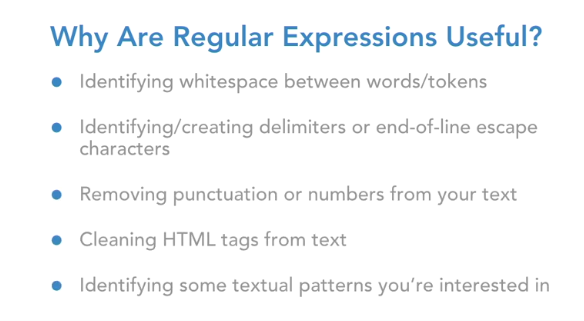

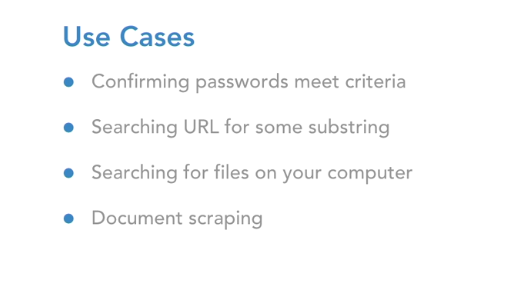
